/tmp/ipykernel_1189851/4114734554.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-white')


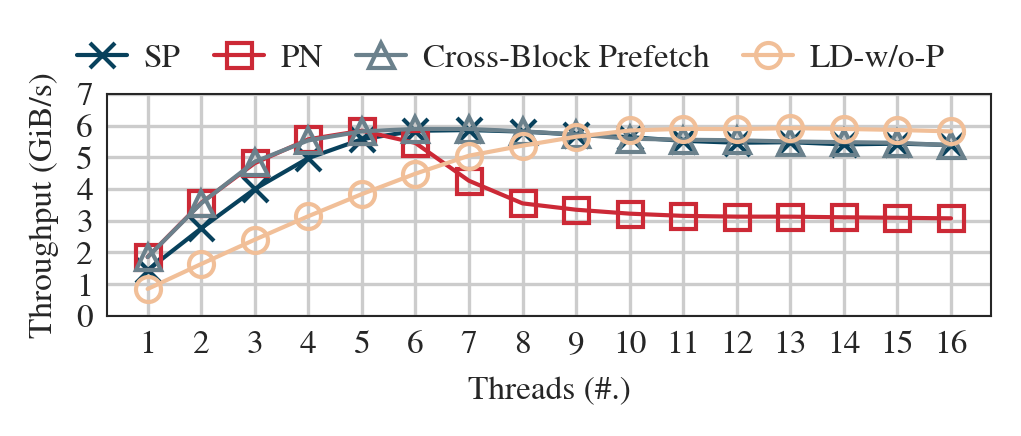

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('seaborn-white')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linewidth"] = 0.8
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# with open("./avg-test-result-multi-in-paper", "r") as f:
with open("./performance-comparison-table-multi", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, engine='python')

sort_dict = {
    "Speculation-64": 0, 
    "Prefetch-Next": 1,
    "Transition": 2,
    "Naive": 3
}

sort_df = pd.DataFrame(df['file_system'].map(sort_dict))
sort_df["num_job"] = df['num_job']
df = df.iloc[sort_df.sort_values(by = ["file_system", "num_job"]).index]

# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(3.5)))
# bar_width = 0.35
# subfig_titles = ["(a) 1 Thread", "(b) 2 Threads", "(c) 4 Threads", "(d) 8 Threads", "(e) 16 Threads"]
# patterns = ['///', '\\\\\\', '', 'XXX', "OOO"]
# Reference: https://designbro.com/blog/inspiration/color-combinations/
line_width = 2
colors = ["#08415c", "#cc2936", "#6b818c", "#f1bf98"]
marks = ["x", "s", "^", "o"]
fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
num_jobs = list(range(1, 17))

for idx, fs in enumerate(fss):
    plt.plot(num_jobs, df[df['file_system'] == fs]['second_bandwidth(MiB/s)'] / 1024, color=colors[idx], markerfacecolor='none', linewidth=1, label=fs, marker=marks[idx], markeredgecolor=colors[idx])

plt.xticks(num_jobs, fontsize=8)
plt.yticks([0, 1, 2 ,3 ,4 ,5 ,6, 7], fontsize=8)
# Speculation-64 Prefetch-Next Transition
fig.legend(fss.map({
    "Speculation-64": "SP", 
    "Prefetch-Next": "PN",
    "Transition": "Cross-Block Prefetch",
    "Naive": "LD-w/o-P"
}), loc='center', ncol=4, bbox_to_anchor=(0.5, 0.95), fontsize=8, handlelength=1.5, handletextpad=0.5, columnspacing=1)
plt.ylabel("Throughput (GiB/s)", fontsize=8)
plt.xlabel("Threads (#.)", fontsize=8)
ax = fig.gca()
lw = 0.5
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(lw)
plt.tight_layout()
plt.savefig("./FIG-Prefetch-MultiThreads.pdf", bbox_inches='tight', pad_inches=0)

In [2]:
# matplotlib.rcParams['text.usetex'] = False
# style.use('seaborn-white')
# plt.rcParams["axes.grid"] = False
# # plt.rcParams["axes.grid.axis"] = "y"
# # plt.rcParams["grid.linewidth"] = 0.8
# plt.rcParams["font.family"] = "Nimbus Roman"
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None

# with open("./avg-test-result-single-in-paper", "r") as f:
#     df = pd.read_csv(f, delim_whitespace=True, engine='python')

# sort_dict = {
#     "Naive" : 0, 
#     "Prefetch-Cmp-64": 1,
#     "Prefetch-Cmp-256-64": 2,
#     "Prefetch-Current" : 3,  
#     "Speculation" :4, 
#     "Prefetch-Next" : 5,  
# }

# sort_df = pd.DataFrame(df['file_system'].map(sort_dict))
# sort_df["num_job"] = df['num_job']
# df = df.iloc[sort_df.sort_values(by = ["file_system", "num_job"]).index]

# # Plotting Settings
# fig = plt.figure(dpi = 300, figsize = (cm_to_inch(DOUBLE_COL_WIDTH), cm_to_inch(5)))
# subfig = plt.subplot(1, 1, 1)
# # figins = subfig.inset_axes((0.6, 0.4, 0.3, 0.5))
# # figins.xaxis.set_visible(False)
# # figins.yaxis.set_visible(False)
# # figins.set_xlim([0, 2])
# bar_width = 0.5
# inner_width = 0.1

# num_job = 1
# fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']

# times = ["second_cmp_lat(ns)", "second_fp_lat(ns)", "second_prefetch_lat(ns)", "second_lookup_lat(ns)", "second_others_lat(ns)"]
# # Reference: https://coolors.co/palettes/popular/6%20colors
# colors = ["#2e59b7", "#1e96fc", "#a2d6f9", "#fcf300", "#ffc600"]
# patterns = ['/', '\\', 'XXX', "OOO", "///", "\\\\\\"]

# x = list(range(1, len(fss) + 1))
# for fs_id, fs in enumerate(fss):
#     left = 0
#     pivot = x[fs_id]
#     inner_left = 0
#     inner_left_range = []
#     start = False
#     for idx, time in enumerate(times):
#         width = df[(df['file_system'] == fs) & (df['num_job'] == num_job)][time].iloc[0] / 1000000000 # s
#         plt.barh(y=pivot, width=width, color=colors[idx], edgecolor='black', left=left, height=bar_width, hatch=patterns[idx])
#         left = left + width
#         bandwidth = df[(df['file_system'] == fs) & (df['num_job'] == num_job)]['second_bandwidth(MiB/s)'].iloc[0]
        
#         if idx == len(times) - 1:
#             if fs_id != 0:
#                 plt.text(left + 3, pivot, str(bandwidth) + " MiB/s", fontsize=7, va='center', ha='center')
#             else:
#                 plt.text(left + 2, pivot, str(bandwidth) + "\nMiB/s", fontsize=7, va='center', ha='center')

# # "Naive" "Prefetch-Cmp-64" "Prefetch-Cmp-256-64" "Prefetch-Current" "Speculation" "Prefetch-Next"
# plt.yticks(x, labels=fss.map({
#     "Naive": "NV",
#     "Prefetch-Cmp-64": "P64",
#     "Prefetch-Cmp-256-64": "P256",
#     "Speculation": "SP",
#     "Prefetch-Current": "PC",
#     "Prefetch-Next": "PN"
# }), fontsize=8)
# plt.xlabel("Time usage (s)", fontsize=8)
# legends = ["Content-Comparison", "Fingerprint Calculation","Prefetch", "Lookup", "Others"]
# plt.legend(legends, loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.3), frameon=False, fontsize=8)
# plt.tight_layout()
# plt.savefig("./FIG-{0}-Thread(s)-Breakdown.pdf".format(num_job), bbox_inches='tight', pad_inches=0)


/tmp/ipykernel_1189851/3208554441.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-white')


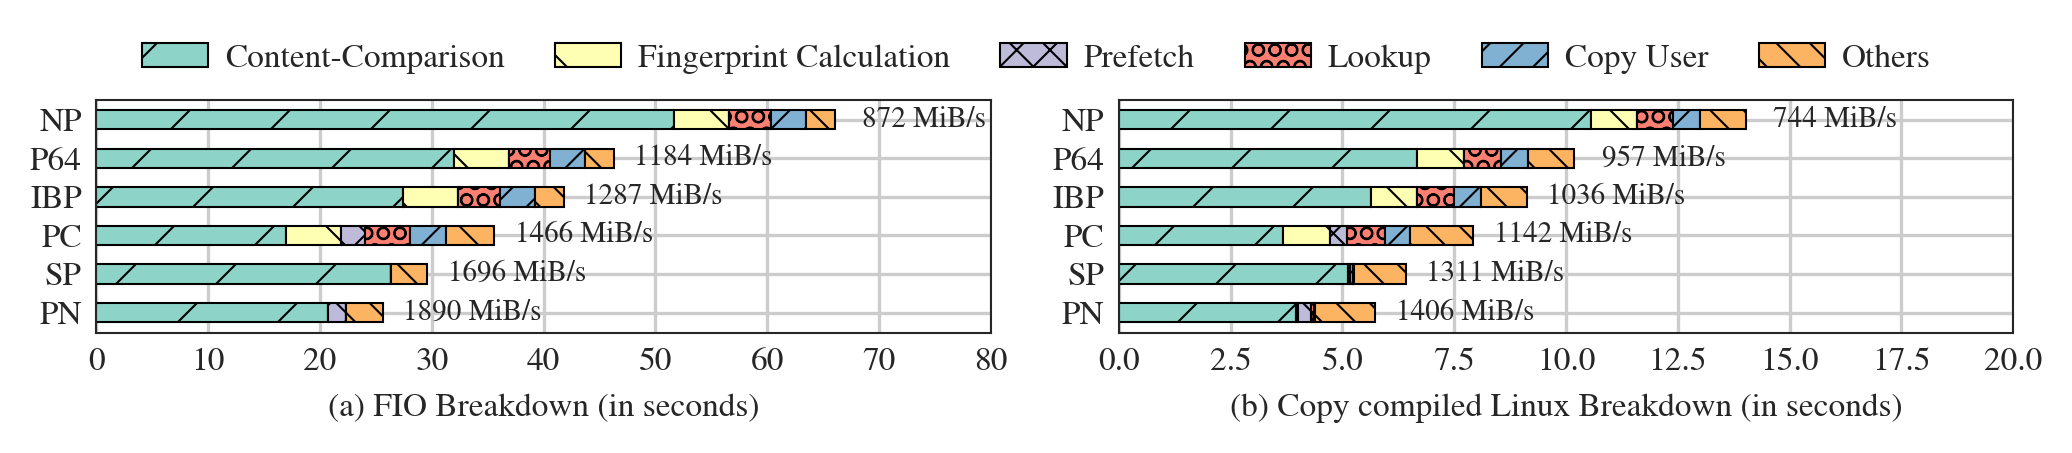

In [3]:
matplotlib.rcParams['text.usetex'] = False
style.use('seaborn-white')
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.linewidth"] = 0.8
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# files = ["./avg-test-result-single-in-paper", "../FIG_CP_Prefetch/performance-comparison-table"]
files = ["./performance-comparison-table-single", "../FIG10b_CP_Prefetch/performance-comparison-table-single"]

# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(DOUBLE_COL_WIDTH), cm_to_inch(3.5)))
bar_width = 0.5
inner_width = 0.1
num_job = 1
times = ["second_cmp_lat(ns)", "second_fp_lat(ns)", "second_prefetch_lat(ns)", "second_lookup_lat(ns)", "second_copy_user(ns)", "second_others_lat(ns)"]
# Reference: https://coolors.co/palettes/popular/6%20colors
colors = ["#093baa", "#0f67e8", "#0078e0", "#0087ff", "#99cfff", "#ffffff"]
patterns = ['/', '\\', 'XXX', "OOO", "///", "\\\\\\", "xxx"]
titles = ["(a) FIO Breakdown (in seconds)", "(b) Copy compiled Linux Breakdown (in seconds)"]
scales = [4, 1]

for fid, file in enumerate(files):
    subfig = plt.subplot(1, 2, fid + 1)
    with open(file, "r") as f:
        df = pd.read_csv(f, delim_whitespace=True, engine='python')

    sort_dict = {
        "Naive" : 6, 
        "Prefetch-Cmp-64": 5,
        "Prefetch-Cmp-256-64": 4,
        "Prefetch-Current" : 3,  
        "Speculation" :2, 
        "Prefetch-Next" : 1,  
        "No-Protect": 0
    }

    sort_df = pd.DataFrame(df['file_system'].map(sort_dict))
    sort_df["num_job"] = df['num_job']
    df = df.iloc[sort_df.sort_values(by = ["file_system", "num_job"]).index]

    fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']

    x = list(range(1, len(fss) + 1))
    for fs_id, fs in enumerate(fss):
        left = 0
        pivot = x[fs_id]
        inner_left = 0
        inner_left_range = []
        start = False
        for idx, time in enumerate(times):
            width = df[(df['file_system'] == fs) & (df['num_job'] == num_job)][time].iloc[0] / 1000000000 # s
            plt.barh(y=pivot, width=width, color=plt.get_cmap('Set3')(idx), edgecolor='black', left=left, height=bar_width, hatch=patterns[idx],linewidth=0.5)
            left = left + width
            bandwidth = df[(df['file_system'] == fs) & (df['num_job'] == num_job)]['second_bandwidth(MiB/s)'].iloc[0]
            
            if idx == len(times) - 1:
                plt.text(left + 2 * scales[fid], pivot, str(bandwidth) + " MiB/s", fontsize=7, va='center', ha='center')
                # if fs_id != len(fss) - 1:
                #     plt.text(left + 2 * scales[fid], pivot, str(bandwidth) + " MiB/s", fontsize=7, va='center', ha='center')
                # else:
                #     plt.text(left + 1 * scales[fid], pivot - 0.2, str(bandwidth) + "\nMiB/s", fontsize=7, va='center', ha='center')
    plt.yticks(x, labels=fss.map({
        "Naive": "NP",
        "Prefetch-Cmp-64": "P64",
        "Prefetch-Cmp-256-64": "IBP",
        "Speculation": "SP",
        "Prefetch-Current": "PC",
        "Prefetch-Next": "PN"
    }), fontsize=8)
    if fid == 0:
        plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80], fontsize=8)
    else:
        plt.xticks([0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20], fontsize=8)
    plt.xlabel(titles[fid], fontsize=8)
    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)

legends = ["Content-Comparison", "Fingerprint Calculation","Prefetch", "Lookup", "Copy User", "Others"]
fig.legend(legends, loc='upper center', ncol=6, bbox_to_anchor=(0.5, 1.1), frameon=False, columnspacing=1.5, handletextpad=0.5,  labelspacing=0.5, fontsize=8)
plt.tight_layout()
plt.savefig("./FIG-FIO-CP-Breakdown.pdf".format(num_job), bbox_inches='tight', pad_inches=0)
